In [30]:

import featureExtraction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataprocessor

In [31]:
dfvg = pd.read_parquet(r'disjoint_subset.praquet')

In [32]:
CD = dfvg[dfvg["Class"] == 'CD']
NORM = dfvg[dfvg["Class"] == 'NORM']
MI = dfvg[dfvg["Class"] == 'MI']
HYP = dfvg[dfvg["Class"] == 'HYP']
STTC = dfvg[dfvg["Class"] == 'STTC']
lis = [CD,NORM,MI,HYP,STTC]

In [33]:
feat = dfvg.columns

In [34]:
X = dfvg[dfvg.columns[1:]]
Y = dfvg["Class"]

In [35]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importance = mutual_info_classif(dfvg[dfvg.columns[1:]],dfvg["Class"])

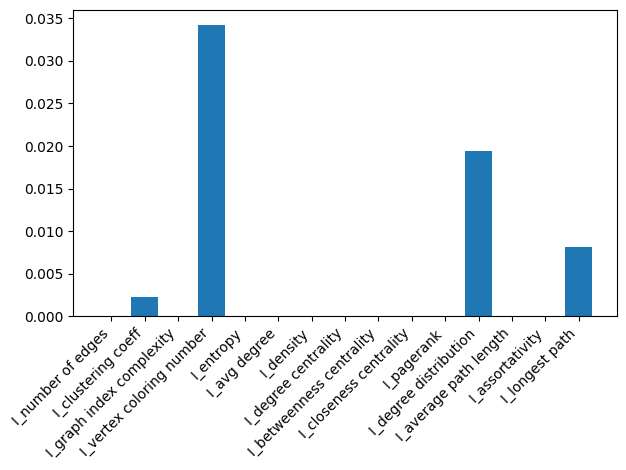

In [36]:
import matplotlib.pyplot as plt

# Assuming dfvg is your DataFrame and importance is your list of heights
plt.bar(dfvg.columns[1:], height=importance)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()

# Display the plot
plt.show()


In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn. feature_selection import chi2

# Convert to categorical data by converting data to integers
X_cat = X.astype(int)

# Three features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 10)
X_kbest_features = chi2_features.fit_transform(X_cat, Y)

# Reduced features
print('Original feature number:', X_cat.shape[1])
print('Reduced feature number:', X_kbest_features. shape[1])
print(X_kbest_features)

Original feature number: 15
Reduced feature number: 10
[[522  10   4 ...   2   0   5]
 [550   9   4 ...   2   0   5]
 [609  13   4 ...   2   0   5]
 ...
 [596  11   4 ...   1   0   4]
 [811  13   4 ...   2   0   4]
 [558  10   4 ...   2   0   4]]


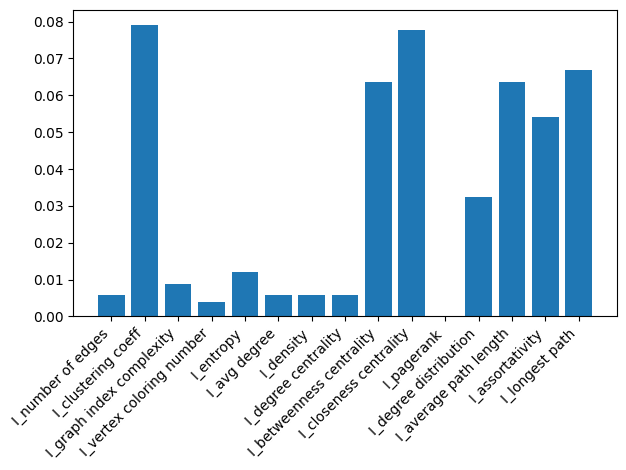

In [38]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

# Calculating scores
ranks = fisher_score.fisher_score(np.array(X), np.array(Y))

# Plotting the ranks
# Assuming dfvg is your DataFrame and importance is your list of heights
plt.bar(dfvg.columns[1:], height=ranks)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [39]:
from sklearn import preprocessing
encoding = preprocessing.LabelEncoder()
new = encoding.fit_transform(Y)

In [40]:
dfvg["Class"] = new

In [41]:
dfvg.corr()

,Class,I_number of edges,I_clustering coeff,I_graph index complexity,I_vertex coloring number,I_entropy,I_avg degree,I_density,I_degree centrality,I_betweenness centrality,I_closeness centrality,I_pagerank,I_degree distribution,I_average path length,I_assortativity,I_longest path
Class,1.000000,-0.002837,0.082401,0.008053,0.013068,0.047209,-0.002837,-0.002837,-0.002837,-0.103689,0.089558,-0.275778,-0.104207,-0.103689,-0.057936,-0.076718
I_number of edges,-0.002837,1.000000,0.085592,0.925214,0.793818,0.879116,1.000000,1.000000,1.000000,-0.546098,0.576768,0.008423,-0.477386,-0.546098,-0.413074,-0.333719
I_clustering coeff,0.082401,0.085592,1.000000,0.147825,0.252184,-0.049327,0.085592,0.085592,0.085592,-0.411143,0.424372,0.053573,-0.385948,-0.411143,-0.239776,-0.381690
I_graph index complexity,0.008053,0.925214,0.147825,1.000000,0.796908,0.864592,0.925214,0.925214,0.925214,-0.607758,0.636781,0.054396,-0.566240,-0.607758,-0.411272,-0.330741
I_vertex coloring number,0.013068,0.793818,0.252184,0.796908,1.000000,0.757578,0.793818,0.793818,0.793818,-0.455145,0.478752,0.023767,-0.412139,-0.455145,-0.220174,-0.282650
I_entropy,0.047209,0.879116,-0.049327,0.864592,0.757578,1.000000,0.879116,0.879116,0.879116,-0.452168,0.459359,-0.041120,-0.406896,-0.452168,-0.314654,-0.235268
I_avg degree,-0.002837,1.000000,0.085592,0.925214,0.793818,0.879116,1.000000,1.000000,1.000000,-0.546098,0.576768,0.008423,-0.477386,-0.546098,-0.413074,-0.333719
I_density,-0.002837,1.000000,0.085592,0.925214,0.793818,0.879116,1.000000,1.000000,1.000000,-0.546098,0.576768,0.008423,-0.477386,-0.546098,-0.413074,-0.333719
I_degree centrality,-0.002837,1.000000,0.085592,0.925214,0.793818,0.879116,1.000000,1.000000,1.000000,-0.546098,0.576768,0.008423,-0.477386,-0.546098,-0.413074,-0.333719
I_betweenness centrality,-0.103689,-0.546098,-0.411143,-0.607758,-0.455145,-0.452168,-0.546098,-0.546098,-0.546098,1.000000,-0.978767,-0.063050,0.862866,1.000000,0.702632,0.782488


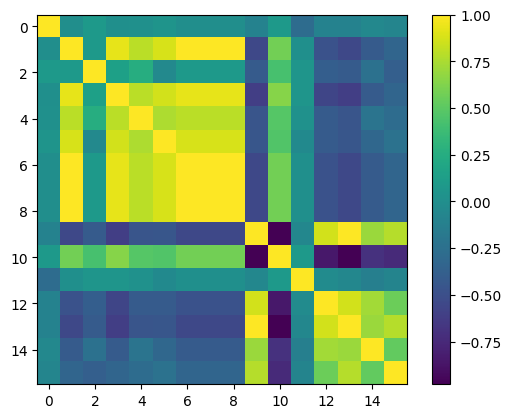

In [42]:
plt.imshow(dfvg.corr())
plt.colorbar()

<Axes: >

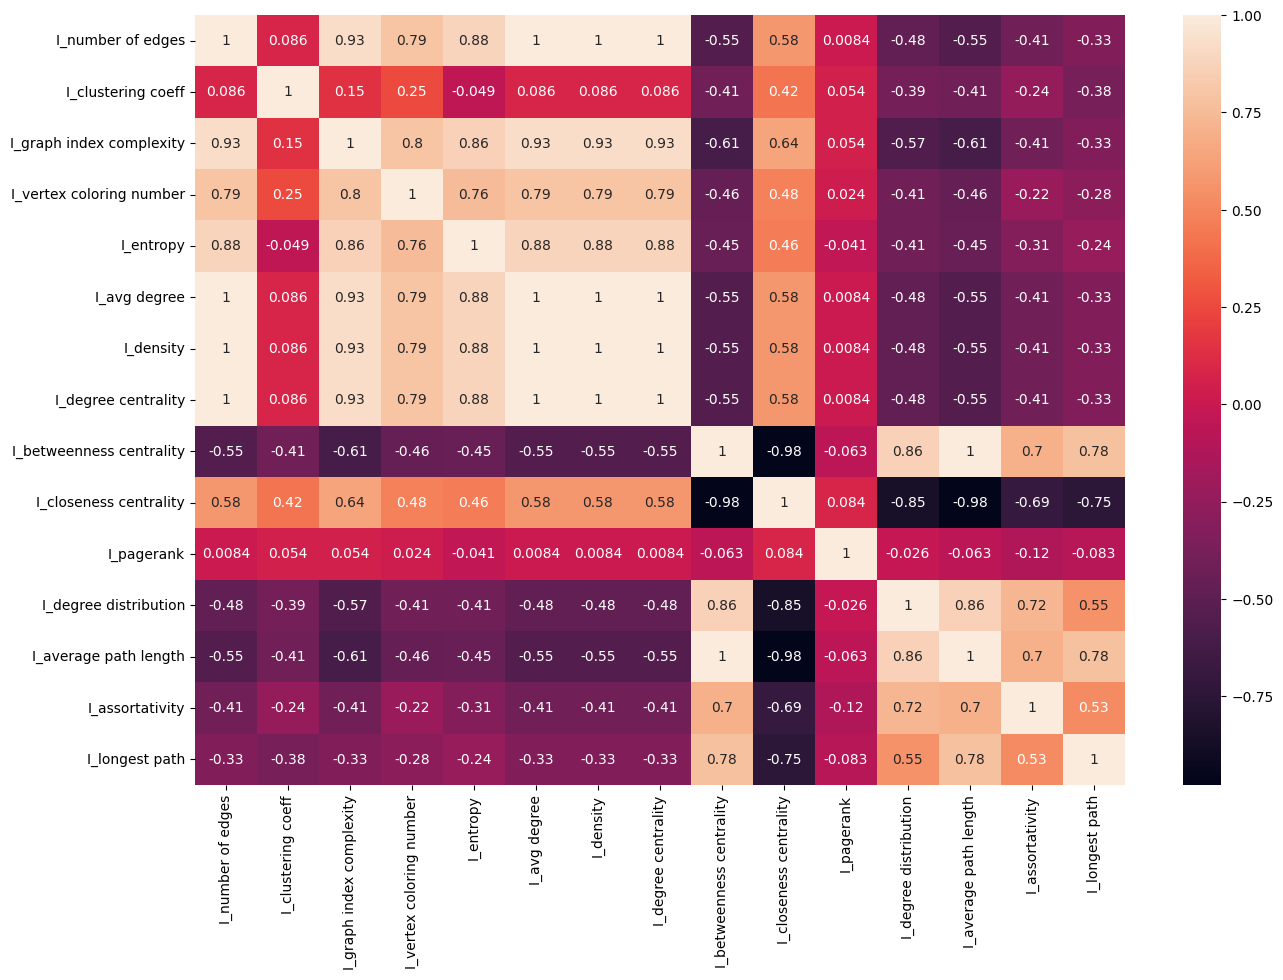

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Correlation matrix
cor = X.corr()

# PLotting Heatmap
plt.figure(figsize = (15,10))
sns.heatmap(cor, annot = True)

<Axes: xlabel='I_clustering coeff', ylabel='Density'>

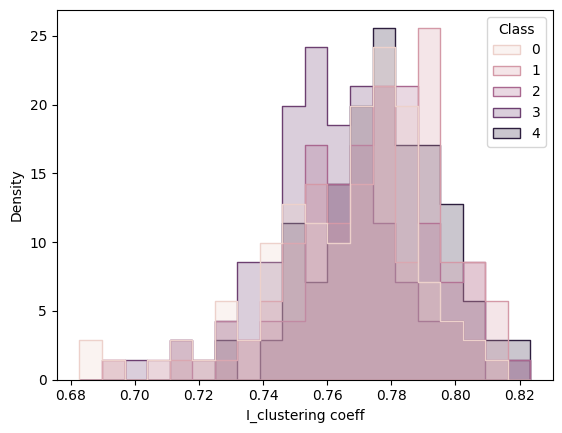

In [44]:
sns.histplot(data=dfvg, x="I_clustering coeff", hue="Class", element="step", stat="density", common_norm=False)

<Axes: xlabel='I_clustering coeff', ylabel='I_assortativity'>

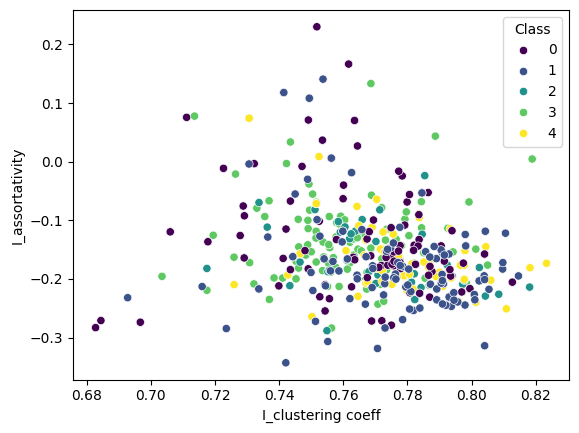

In [45]:
sns.scatterplot(data=dfvg, x="I_clustering coeff", y="I_assortativity", hue="Class", palette="viridis")

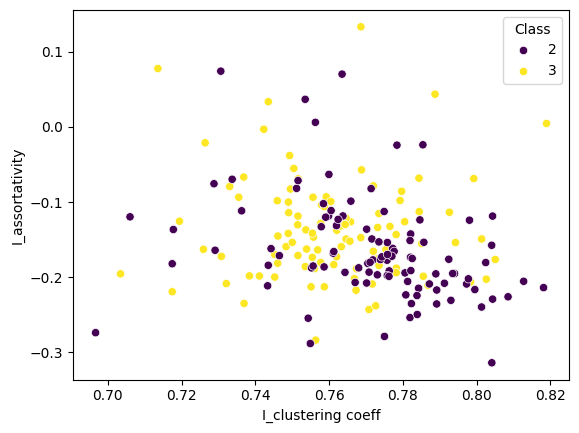

In [46]:
import pandas as pd

# Assuming dfvg is your DataFrame
# Filter the DataFrame to include only rows where the "Class" column is 0 or 1
filtered_df = dfvg[dfvg['Class'].isin([3, 2])]

# Create the scatter plot with the filtered data
sns.scatterplot(data=filtered_df, x="I_clustering coeff", y="I_assortativity", hue="Class", palette="viridis")

# Show the plot
plt.show()


In [47]:
print(Y[299])

STTC


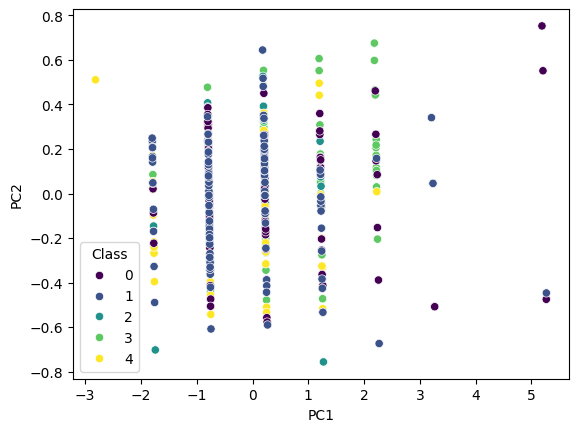

In [48]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dfvg is your DataFrame and feat is your list of features
# Selecting the desired features
selected_features = [feat[2], feat[5], feat[10], feat[11], feat[14], feat[15]]
class_column = feat[0]

# Creating a new DataFrame with the selected features and class column
newframe = dfvg[[class_column] + selected_features]

# Separating the features for PCA and the class labels
X = newframe[selected_features]
y = newframe[class_column]

# Performing PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Creating a new DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df[class_column] = y.values

# Creating the scatter plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=class_column, palette='viridis')

# Show the plot
plt.show()


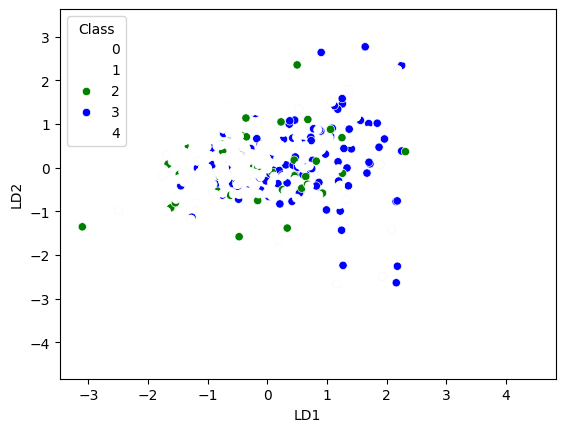

In [49]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dfvg is your DataFrame and feat is your list of features
# Selecting the desired features
selected_features = [feat[2], feat[5], feat[10], feat[11], feat[14], feat[15]]
class_column = feat[0]

# Creating a new DataFrame with the selected features and class column
newframe = dfvg[[class_column] + selected_features]

# Separating the features for LDA and the class labels
X = newframe[selected_features]
y = newframe[class_column]

# Performing LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda_components = lda.fit_transform(X, y)

# Creating a new DataFrame for the LDA results
lda_df = pd.DataFrame(data=lda_components, columns=['LD1', 'LD2'])
lda_df[class_column] = y.values

# Creating the scatter plot
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue=class_column, palette=['white',"white","green","blue","white"])

# Show the plot
plt.show()
